## Analysis of a Car Sell Dataset Part 2

There are two goals in the second analysis task: (1), train linear regression models to predict the selling prices of cars; (2) assess the data ethics issues. There are *7* questions in this portfolio. 

The first goal involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned car_sells sub-dataset that **is different from** the one in “Analysis of a Car Sell Dataset” task 1. This goal covers Questions *1-6*. 

Question *7* is about data ethics issue.

In [2]:
your_name = "Mohammadpouya Alavi Naeini"
your_student_id = "48160202"

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from statistics import correlation
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import OrdinalEncoder
reg = linear_model.LinearRegression()
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

### Q1: Import Cleaned Car Sell Dataset
The csv file named 'car_sells_clean_data.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [4]:
csvfile=pd.read_csv("car_sells_clean_data.csv")
print("The total length is:",len(csvfile))

The total length is: 3657


### Q2: Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict cars' selling prices given other columns, please get the correlations between year/km_driven/seller_type/fuel/owner and selling_price by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., seller_type and owner) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding selling_price. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for selling_price prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [5]:
csvfile.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007.0,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007.0,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012.0,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017.0,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014.0,450000,141000,Diesel,Individual,Manual,Second Owner


In [6]:
csvfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3657 entries, 0 to 3656
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           3657 non-null   object 
 1   year           3657 non-null   float64
 2   selling_price  3657 non-null   int64  
 3   km_driven      3657 non-null   int64  
 4   fuel           3657 non-null   object 
 5   seller_type    3657 non-null   object 
 6   transmission   3657 non-null   object 
 7   owner          3657 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 228.7+ KB


In [7]:
encoder = OrdinalEncoder()
csvfile[['seller_type', 'fuel', 'owner']] = encoder.fit_transform(csvfile[['seller_type', 'fuel', 'owner']])
columns_cor = csvfile[['selling_price', 'year', 'km_driven', 'seller_type', 'fuel', 'owner']].corr()
selling_price_cor = columns_cor['selling_price'].drop('selling_price')
selling_price_cor

year           0.411103
km_driven     -0.177203
seller_type   -0.208637
fuel          -0.277627
owner         -0.205524
Name: selling_price, dtype: float64

### necessary explanations/analysis 
* Positive Correlations:
	* Year: The manufacturing year of the car is positively correlated with the selling price. This means that newer cars tend to be sold at higher prices.
* Negative Correlations:
	* Km Driven: The number of kilometers driven is negatively correlated with the selling price. This indicates that cars with higher mileage tend to have lower selling prices.
	*	Seller Type : This suggests that cars sold by individuals tend to have lower selling prices compared to those sold by dealers. 
    *	Fuel Type : The fuel type, particularly petrol is negatively correlated with the selling price. This could suggest that diesel cars are generally valued higher.
	*	Owner: The number of previous owners is negatively correlated with the selling price. Cars that have had more owners typically have lower resale values.
	    
* Most and Least Correlated Features: According to the correlations, Most is year and least is 	Km Driven.

* Correlations explanation:
	 *   ___Year___ has the highest positive correlation with selling price, it will likely be a key predictor in any regression model. The model will use this feature to adjust the price upwards for newer cars.
	 * ___Km driven___ suggests that higher mileage will decrease the predicted selling price, but its relatively lower correlation indicates that its impact might be less than that of other features.
	 *	___seller_type and Owner and fuel___ with their negative correlations, will contribute to lowering the predicted selling price. The model will likely adjust the price downwards for cars sold by individuals, those using petrol, or those with multiple previous owners.
* Hypothesis
   *	Based on these correlations, I hypothesise that the regression model will rely most heavily on the year to predict the selling price, with significant but smaller adjustments based on seller_type, fuel, owner, and km_driven. The model should predict higher prices for newer cars and lower prices for those with higher mileage or multiple previous owners.
	

### Q3: Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please randomly split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

In [8]:
#Case 1
train, test = train_test_split(csvfile, train_size=0.1, random_state=42)
print("Training set shape:", train.shape)
print("Testing set shape:", test.shape)

Training set shape: (365, 8)
Testing set shape: (3292, 8)


In [9]:
#Case 2
train, test = train_test_split(csvfile, train_size=0.9, random_state=42)
print("Training set shape:", train.shape)
print("Testing set shape:", test.shape)

Training set shape: (3291, 8)
Testing set shape: (366, 8)


### Q4: Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding selling_price, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

In [13]:
#Model a
train, test = train_test_split(csvfile, test_size=0.9, random_state=42)

X_a_train = train[['year', 'fuel']]
y_a_train = train['selling_price']
X_a_test = test[['year', 'fuel']]
y_a_test = test['selling_price']

reg.fit(X_a_train, y_a_train)



LinearRegression()

In [14]:
#Model b
train, test = train_test_split(csvfile, test_size=0.9, random_state=42)

X_b_train = train[['km_driven', 'owner']]
y_b_train = train['selling_price']
X_b_test = test[['km_driven', 'owner']]
y_b_test = test['selling_price']

reg.fit(X_b_train, y_a_train)

LinearRegression()

In [15]:
#Model c
train, test = train_test_split(csvfile, test_size=0.1, random_state=42)

X_c_train = train[['year', 'fuel']]
y_c_train = train['selling_price']
X_c_test = test[['year', 'fuel']]
y_c_test = test['selling_price']

reg.fit(X_c_train, y_c_train)

LinearRegression()

In [16]:
#Model d
train, test = train_test_split(csvfile, test_size=0.1, random_state=42)

X_d_train = train[['km_driven', 'owner']]
y_d_train = train['selling_price']
X_d_test = test[['km_driven', 'owner']]
y_d_test = test['selling_price']

reg.fit(X_d_train, y_d_train)


LinearRegression()

### Q5: Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

In [17]:
#Model a
reg.fit(X_a_train, y_a_train)
predicted = reg.predict(X_a_test)
mse_a = ((np.array(y_a_test)-predicted)**2).sum()/len(y_a_test)
rootmse_a = np.sqrt(mse_a)
print("MSE:", mse_a)
print("Root MSE:", rootmse_a)

MSE: 240873725575.09454
Root MSE: 490788.8808592698


In [18]:
#Model b
reg.fit(X_b_train, y_b_train)
predicted = reg.predict(X_b_test)
mse_b = ((np.array(y_b_test)-predicted)**2).sum()/len(y_b_test)
rootmse_b = np.sqrt(mse_b)
print("MSE:", mse_b)
print("R Squared:", rootmse_b)

MSE: 292715789614.6963
R Squared: 541032.152108076


In [19]:
#Model c
reg.fit(X_c_train, y_c_train)
predicted = reg.predict(X_c_test)
mse_c = ((np.array(y_c_test)-predicted)**2).sum()/len(y_c_test)
rootmse_c = np.sqrt(mse_c)
print("MSE:", mse_c)
print("R Squared:", rootmse_c)

MSE: 141350876932.5773
R Squared: 375966.59018133156


In [20]:
#Model d
reg.fit(X_d_train, y_d_train)
predicted = reg.predict(X_d_test)
mse_d = ((np.array(y_d_test)-predicted)**2).sum()/len(y_d_test)
rootmse_d = np.sqrt(mse_d)
print("MSE:", mse_d)
print("R Squared:", rootmse_d)

MSE: 195254216561.59534
R Squared: 441875.7931382928


### Q6: Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

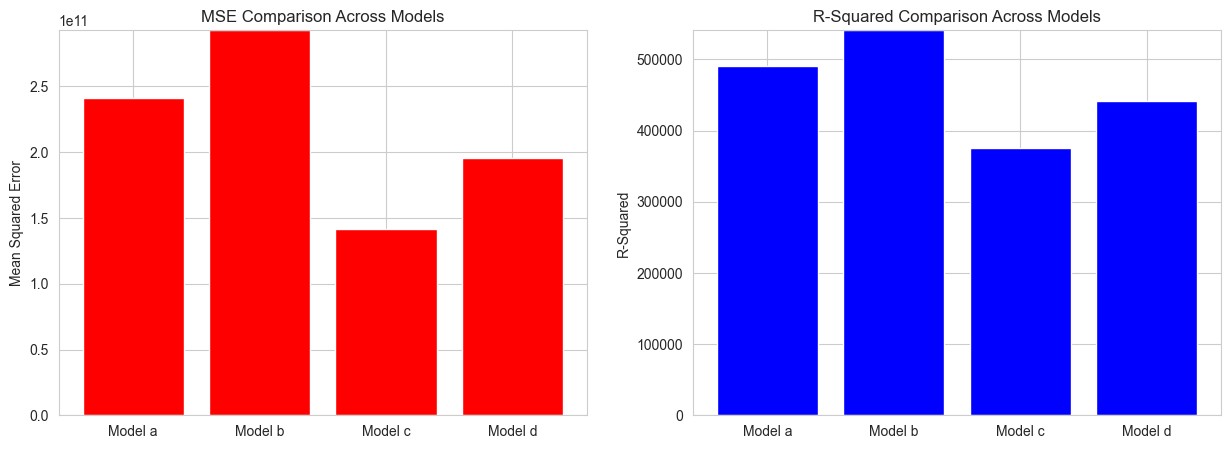

In [22]:
mse_values = [mse_a, mse_b, mse_c, mse_d]
rootmse_values = [rootmse_a, rootmse_b, rootmse_c, rootmse_d]
models = ['Model a', 'Model b', 'Model c', 'Model d']
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].bar(models, mse_values, color='red')
ax[0].set_title('MSE Comparison Across Models')
ax[0].set_ylabel('Mean Squared Error')
ax[0].set_ylim(0, max(mse_values) ) 


ax[1].bar(models, rootmse_values, color='blue')
ax[1].set_title('R-Squared Comparison Across Models')
ax[1].set_ylabel('R-Squared')
ax[1].set_ylim(0, max(rootmse_values))

plt.show()

* Impact of Training Data Size (Model-a vs. Model-c and Model-b vs. Model-d):
	 *  Model-a (10% Training Data) vs. Model-c (90% Training Data): Typically, Model-c should have a lower MSE and a higher R-squared than Model-a due to the more extensive training set size. More data allows the model to learn better and generalise new data well.
     *  Possible Deviations: If Model-a outperforms Model-c, it might be due to overfitting in Model-c if the model is too complex relative to the amount of data or due to extensive data that affects the model’s learning.
     *  Model-b (10% Training Data) vs. Model-d (90% Training Data): Model-d should perform better than Model-b because of the more extensive training data, despite using less correlated features.
     *  Possible Deviations: If Model-d performs poorly, it could indicate that the least correlated features do not provide enough predictive power, regardless of the training data size.
*  Impact of Feature Selection (Model-a vs. Model-b and Model-c vs. Model-d):
      *   Model-a (Most Correlated Features) vs. Model-b (Least Correlated Features): Model-a should outperform Model-b because it uses features that are more strongly related to the target variable (selling_price).
	  *	Possible Deviations: If Model-b performs similarly to or better than Model-a, it might suggest that the model benefits from more generalised (less correlated) features or that the most correlated features do not capture all the variability in the target variable.
	  *  Model-c (Most Correlated Features) vs. Model-d (Least Correlated Features): Model-c should outperform Model-d for the same reasons.
      *  Possible Deviations: Like the earlier point, if Model-d performs better, it could indicate that the least correlated features, when combined with more data, provide better generalisation or that the correlations are not perfectly indicative of feature importance.
         
* Conclusion:
     * Expected Outcome: Model-c with more data and more correlated features performs the best, and Model-b with fewer data and less correlated features performs the worst.
     *  Deviations: If the expected outcomes are not observed, you must consider factors such as data quality, feature interactions, potential overfitting, and the complexity of the relationships between features and the target variable.

### Q7: Data Science Ethics
*Please read the following examples [Click here to read the example_1.](https://www.vox.com/covid-19-coronavirus-us-response-trump/2020/5/18/21262265/georgia-covid-19-cases-declining-reopening) [Click here to read the example_2.](https://viborc.com/ethics-and-ethical-data-visualization-a-complete-guide/)

*Then view the picture ![My Image](figure_portfolio2.png "This is my image")
Please compose an analysis of 100-200 words that evaluates potential ethical concerns associated with the infographic, detailing the reasons behind these issues.


### Ethical Concerns in Data Visualization

When evaluating the ethical concerns associated with an infographic, several vital issues can arise:

**Misleading Representation**:
   - **Selective Data Presentation**: If the infographic selectively presents data to support a specific narrative, it can mislead viewers. For example, showing only the declining COVID-19 cases without context about testing rates or other relevant factors can create a false sense of security.
   - **Manipulative Visuals**: Using specific colours, scales, or chart types can exaggerate or downplay trends. For instance, a truncated y-axis can make minor changes appear more significant.

**Lack of Context**:
   - **Omission of Key Information**: Not providing context, such as the data collection period or the geographic scope, can lead to misinterpretation. Viewers might need help understanding the full picture and making decisions based on incomplete information.

**Bias and Objectivity**:
   - **Confirmation Bias**: Infographics that confirm pre-existing beliefs without presenting balanced viewpoints can reinforce biases. This is particularly concerning in politically charged topics like COVID-19 responses.
   - **Ethical Responsibility**: Data visualisers are responsible for presenting data truthfully and objectively. Ethical visualisation practices ensure that the audience receives accurate and unbiased information.

### Impact on Decision-Making

Ethical concerns in data visualisation can significantly impact decision-making. Misleading or biased infographics can lead to poor public health decisions, such as premature reopening during a pandemic. Ensuring ethical standards in data visualisation helps build trust, promotes informed decision-making, and supports a well-informed society.